

# Project: TMDb Movies Data Analysis  (Investigate a Dataset of TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

TMDb movie data is a data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

<b>Questions that we can ask in this investigataion of the data set<b>
<ul>
<li><b>Which Genre Has The Highest Release Of Movies Over Time? <b></li>
<li><b>which is Top 10 production companies that made movies over years?<b></li>
<li><b>which month have maximum movies released over years?<b></li>
<li><b>Did movies with high rating have a big budget for last 15 year in dataset?</b></li>    

</ul>


In [1]:
# import statements for all of the packages that you
import numpy as np # Numpy for mathmatic and linear algebra operations.
import pandas as pd # Pandas to hold and manipulate the data.
import matplotlib.pyplot as plt
import seaborn as sns

# include a 'magic word' so visualizations are plotted
#   inline with the notebook. 
%matplotlib inline
#fix number format
pd.options.display.float_format = '{:.2f}'.format



## Data Wrangling<a id='wrangling'></a>



### General Properties

In [2]:
# Loading data 
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
#print out a few lines of the data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


In [3]:
df.shape

(10866, 21)

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


In [5]:
df.dtypes #to get types of columns

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
df.info() #get som info for our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [8]:
#count total rows in each column which contain null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning 

##### here we remove missing values , drop not used columns , fix data format, and add new columns for make data processing more simple )



In [9]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
df_with_no_null = df.fillna(value=0)

In [11]:
df_with_no_null.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [12]:
 # convert the Release Date column to datetime
df['release_date'] = pd.to_datetime(df['release_date'])
# get month from the Release Date column to create an Release Month name column
df['release_month'] = df['release_date'].dt.month
df['release_month_name'] = df['release_date'].dt.month_name()
df['budget_adj_m'] = df['budget_adj']/1000000 # add column for budget by million  



In [13]:
#split genre to 5 column {genre_1, genre_2, genre_3, genre_4, genre_5 }
df_genres = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genre_{x+1}"))
df_genres.head()


,genre_1,genre_2,genre_3,genre_4,genre_5
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [14]:
#join df_genres with main dataset
df=df.join([ df_genres])
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,budget_adj,revenue_adj,release_month,release_month_name,budget_adj_m,genre_1,genre_2,genre_3,genre_4,genre_5
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,137999939.28,1392445892.52,6,June,138.00,Action,Adventure,Science Fiction,Thriller,None
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,137999939.28,348161292.49,5,May,138.00,Action,Adventure,Science Fiction,Thriller,None
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,101199955.47,271619025.41,3,March,101.20,Adventure,Science Fiction,Thriller,None,None
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,183999919.04,1902723129.80,12,December,184.00,Action,Adventure,Science Fiction,Fantasy,None
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,174799923.09,1385748801.47,4,April,174.80,Action,Crime,Thriller,None,None


In [15]:
#remove unused Columns
df.drop(['homepage','tagline','keywords','overview','runtime','genres'],axis=1,inplace=True) 

In [16]:
df.head() # see the data set after removing 

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,production_companies,release_date,...,budget_adj,revenue_adj,release_month,release_month_name,budget_adj_m,genre_1,genre_2,genre_3,genre_4,genre_5
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,...,137999939.28,1392445892.52,6,June,138.00,Action,Adventure,Science Fiction,Thriller,None
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,...,137999939.28,348161292.49,5,May,138.00,Action,Adventure,Science Fiction,Thriller,None
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,...,101199955.47,271619025.41,3,March,101.20,Adventure,Science Fiction,Thriller,None,None
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,...,183999919.04,1902723129.80,12,December,184.00,Action,Adventure,Science Fiction,Fantasy,None
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Universal Pictures|Original Film|Media Rights ...,2015-04-01,...,174799923.09,1385748801.47,4,April,174.80,Action,Crime,Thriller,None,None


In [17]:
df['release_date'].dt.month

0         6
1         5
2         3
3        12
4         4
5        12
6         6
7         9
8         6
9         6
10       10
11        2
12        1
13        7
14        4
15       12
16        1
17        7
18        3
19       11
20        5
21        6
22        5
23        2
24       12
25        7
26        6
27        1
28       11
29        9
         ..
10836     1
10837     6
10838    11
10839    10
10840    12
10841    10
10842     1
10843     6
10844     1
10845     3
10846     1
10847     6
10848     8
10849    12
10850     2
10851     6
10852     5
10853     3
10854     2
10855     1
10856     2
10857     6
10858     5
10859    10
10860     5
10861     6
10862    12
10863     1
10864    11
10865    11
Name: release_date, Length: 10866, dtype: int64

### functions section

In [18]:
#this function draw bar chart
def draw_bar_chart(df ,title ,xlabel ,ylabel,bar_color = 'blue' ,chart_type = 'bar'):
    #plot
    if chart_type == 'line':
        c_bar = df.plot.line(color = bar_color, fontsize = 8)
    elif chart_type == 'bar':
        c_bar = df.plot.bar(color = bar_color, fontsize = 8)
    else:
        c_bar = df.plot.scatter(color = bar_color, fontsize = 8)

    #figure size(width, height)
    c_bar.figure.set_size_inches(10, 7);

    #Add labels
    plt.title(title, color = 'black', fontsize = '13')
    plt.xlabel(xlabel, color = 'black', fontsize = '10')
    plt.ylabel(ylabel, color = 'black', fontsize = '10');


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.



### Research Question 1  (Which Genre Has The Highest Release Of Movies Over Time?)

In [19]:
# Count unique genre for eache {genre_1,genre_2,genre_3,genre_4,genre_5}
count_unique1 = df.rename(columns = {'genre_1':'genre'}).groupby(['genre'])['genre'].count()   # Apply unique function
count_unique2 = df.rename(columns = {'genre_2':'genre'}).groupby(['genre'])['genre'].count()   # Apply unique function
count_unique3 = df.rename(columns = {'genre_3':'genre'}).groupby(['genre'])['genre'].count() 
count_unique4 = df.rename(columns = {'genre_4':'genre'}).groupby(['genre'])['genre'].count() 
count_unique5 = df.rename(columns = {'genre_5':'genre'}).groupby(['genre'])['genre'].count()  
count_unique = pd.concat([count_unique1, count_unique2, count_unique3, count_unique4, count_unique5]).groupby(['genre']).sum()
print(count_unique) 

genre
Action             2385
Adventure          1471
Animation           699
Comedy             3793
Crime              1355
Documentary         520
Drama              4761
Family             1231
Fantasy             916
Foreign             188
History             334
Horror             1637
Music               408
Mystery             810
Romance            1712
Science Fiction    1230
TV Movie            167
Thriller           2908
War                 270
Western             165
Name: genre, dtype: int64


#### Showing the number of movies per gener over all dataset to get the gener name that have maximum movies released over years 

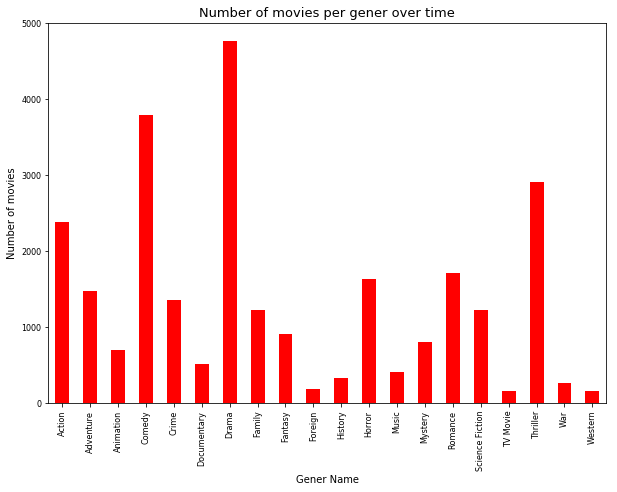

In [20]:
#plot
draw_bar_chart(count_unique , 'Number of movies per gener over time' , 'Gener Name','Number of movies','red')

> **Tip**: we can find from the above chart that <b>Drama</b> is the Gener that has the maximum number of movies released over the years

### Research Question 2 (which is Top 10 production companies that made movies over years ?)

In [21]:
production_companies = df['production_companies'].str.cat(sep = '|')
#giving pandas series and storing the values separately
production_companies = pd.Series(production_companies.split('|'))

#The result will be in descending order so that the first element is the most frequently-occurring element.
production_companies_frequency = production_companies.value_counts(ascending = False)
Top10_production_companies = production_companies_frequency.head(10)
Top10_production_companies 

Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
New Line Cinema                           219
Metro-Goldwyn-Mayer (MGM)                 218
Walt Disney Pictures                      214
Touchstone Pictures                       178
Columbia Pictures Corporation             160
dtype: int64

#### Showing the Top 10 production companies made movies over years

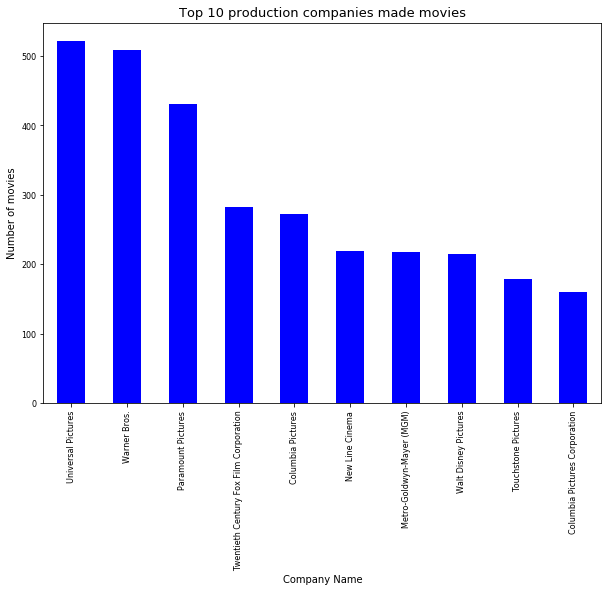

In [22]:
#plot Top 10 production companies made movies
draw_bar_chart(Top10_production_companies , 'Top 10 production companies made movies' , 'Company Name','Number of movies')

> **Tip**:we can find from the above chart that the Top 10 production companies that made more movies over years are:
<br>1-Universal Pictures by 522 movies
<br>2-Warner Bros by 509 movies
<br>3-Paramount Pictures by 431 movies
<br>4-Twentieth Century Fox Film Corporation by 282 movies
<br>5-Columbia Pictures by 272 movies
<br>6-New Line Cinema by 219 movies
<br>7-Metro-Goldwyn-Mayer (MGM) by 218 movies
<br>8-Walt Disney Pictures by 214 movies
<br>9-Touchstone Pictures by 178 movies
<br>10-Columbia Pictures Corporation by 160 movies

### Research Question 3 (which month have maximum movies released over years ?)

In [23]:

month_m = df.groupby(['release_month_name' ]).size().nlargest(1).head()
print("month have maximum movies released over years" ,month_m )
dd = df.groupby(['release_month','release_month_name' ], group_keys=False).size()
dd.head(12)

month have maximum movies released over years release_month_name
September    1331
dtype: int64


release_month  release_month_name
1              January                919
2              February               691
3              March                  823
4              April                  797
5              May                    809
6              June                   827
7              July                   799
8              August                 918
9              September             1331
10             October               1153
11             November               814
12             December               985
dtype: int64

#### Showing the number of movies per month over all dataset to get the month name that have maximum movies released over years

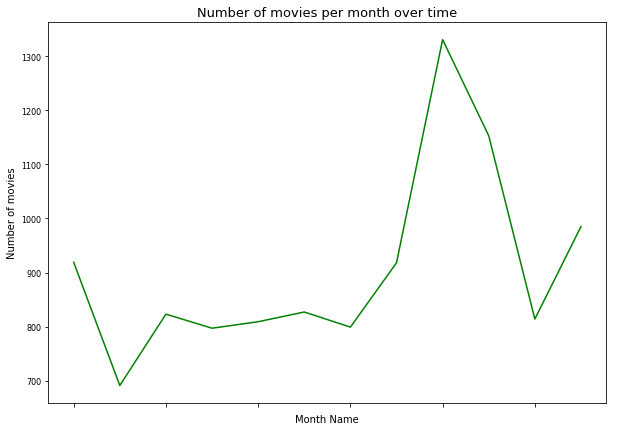

In [24]:
#plot
draw_bar_chart(dd , 'Number of movies per month over time' , 'Month Name','Number of movies','green','line')

> **Tip**: we can find from the above chart that September is the month that has the maximum number of movies released over the years

### Research Question 4  (Did movies with high rating have a big budget for last 15 year in dataset?)

In [25]:
#based on chart below is not necessary that movies that have beeter reatin have big budget
df_last_15y = df[(df['release_year'] >= 2000) & (df['release_year'] <= 2015)]

df_vote_average = df_last_15y[['budget_adj_m' , 'vote_average']]#Slice DataFrame to get 2 columns 'budget_adj' and 'vote_average'
df_vote_average


,budget_adj_m,vote_average
0,138.00,6.50
1,138.00,7.10
2,101.20,6.30
3,184.00,7.50
4,174.80,7.30
5,124.20,7.20
6,142.60,5.80
7,99.36,7.60
8,68.08,6.50
9,161.00,8.00


#### Showing the correlation between votes average and Budget By Million to get the answer of Did movies with high ratings is necessary produced by a big budget

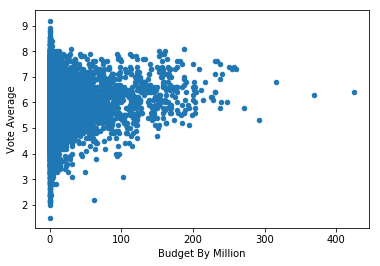

In [26]:
df_vote_average.plot(x='budget_adj_m', y='vote_average', kind='scatter');
plt.xlabel('Budget By Million')
plt.ylabel('Vote Average');

> **Tip**: we can say from the above chart that the movies with high ratings it does not necessarily have a big budget for the last 15 years in dataset, also based on the chart above a lot of that movies have not had a big budget have a good rating 

### Limitations <a id='limitations'></a>
below are some limitations, i found in this dataset

<ul>

<li>missing data : for that some data was set to 0 in handling missing data step  </li>
<li>the data set does not include the most recent data, the data from 2016 till now is not included in the data and this may affect this report result</li>
<li>the data have some difficulty in processing because some columns have multi values in the same cell </li>    
<li>the result in this report is just indicators, not to be generalized </li>
</ul>

<a id='conclusions'></a>
## Conclusions

> **Q1**: the genre that Has The Highest Release Of Movies is <b>Drama</b> movies

> **Q2**: the Top 10 production companies that made more movies over years is
<br>1-Universal Pictures                        
<br>2-Warner Bros.                              
<br>3-Paramount Pictures                        
<br>4-Twentieth Century Fox Film Corporation    
<br>5-Columbia Pictures                         
<br>6-New Line Cinema                           
<br>7-Metro-Goldwyn-Mayer (MGM)                 
<br>8-Walt Disney Pictures                      
<br>9-Touchstone Pictures                       
<br>10-Columbia Pictures Corporation            

> **Q3**: the month that have maximum movies released over years is <b>September</b> 

> **Q4**: the movies with high ratings it does not necessarily have a big budget based on the last 15 years in dataset , also based on the chart above a lot of movies that do have not big budgets have good ratings, also we can say movies that have a budget of 100 million to 200 million have a good chance to have a good rating


